<div class='alert alert-info'>
    <h1>
        <center>
            <font color='Darkblue'>K-Nearest Neighbors (KNN) Algorithm </font>
        </center>
    </h1>
</div>

           K-Nearest Neightbours (KNN) is a Supervised Learning Algorithm used for both classication and regression tasks.It is a non-parametric and instance-based(nearest neighbours) learning algorithm that makes predictions based on the similarity of data points.     

                K-NN is a non-parametric and lazy learning algorithm.Non-Parametric means there is no assumption for underlying data distribution that means the model structure is determined from the datset.
        
                In this we don't have inbuilt parameters ,We have to give external hyperparameter(user defining values) tuning techniques. 

        It is called Lazy Algorithm because it does not need any training data points for model generation.All training data is used in the testing phase which makes training faster and testing phase slower and costlier.
                That means Here the model doesn't train on training set,It's just store that traning data and using these data when we have to predict the new data points It will consider these data points.

        K-Nearest Neighbours (KNN) is asimple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure.
        For Example ,If give new  new data point to the model ,It will assign that new data to the classes based on thier nearest neighbours.
        

# <font color='Darkblue'>KNN Classification<font>

        In KNN Classification ,the output is a class membership .An object is classified by a plurality vote of its neighbours,with the object being assigned to the 'class most common among its k nearest neighbours (k is positive interger,typically small),It k=1 then the object is simply assigned to the class of that single nearest neighbour.
        

# <font color='Darkblue'>🔹 How KNN Works<font>
        1.Choose a value for K (number of neighbors).
        
        2.Calculate the distance between the new data point and all points in the dataset.
        
        3.Select the K nearest neighbors (smallest distances).
        
        4.For classification → Assign the most common class label among the neighbors.
        
        5.For regression → Take the average of the nearest neighbors' values.


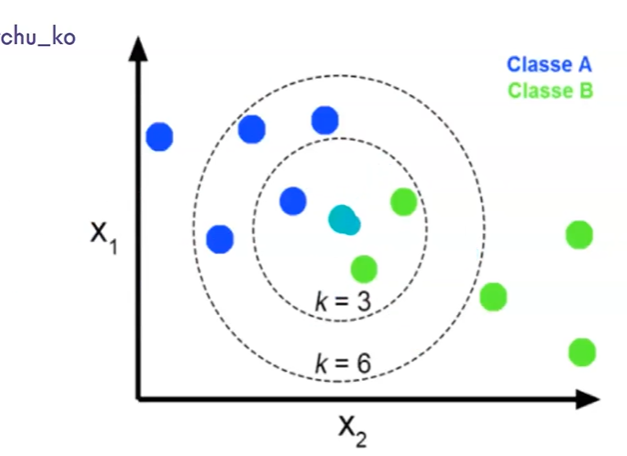

In [1]:
from PIL import Image
Image.open('s98.png')

        Here we have taken one example ,and we have to assign the new data point based on the k-nearest neighbours,Here the soap blue color is our new data point and blue is Class A and green is Class B and we have taken firstly k=3 ,here we have considered 3 nearest neighbours that means we have to take 3 neighbours based on to calcualte the Euclidean Distance(small distance points) ,In which class have highest neighbours ,then the model will assign that new data point that perticular class. 

                To Determine which of the K instances in the training dataset are most similar to a new input ,a distance measure is used .For real-valued input variable,the most popular distance measure is the 'Euclidean Distance'

# <font color='Darkblue'>🔹 Types of Distance Metrics<font>

# <font color='#FF33A1'>1.Euclidean Distance<font>

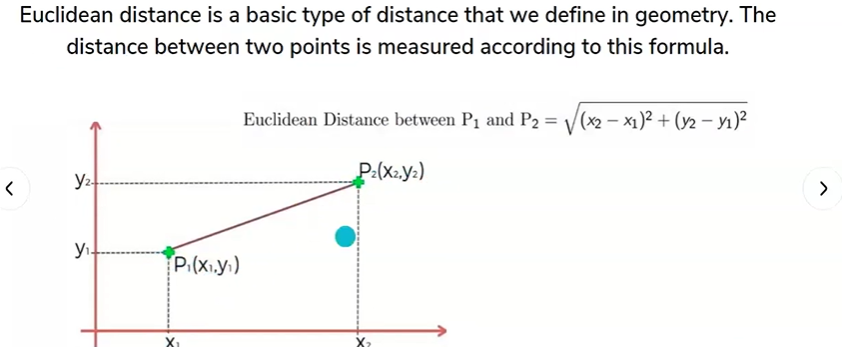

In [2]:
Image.open('s99.png')

# <font color='#FF33A1'> 2.Manhattan Distance<font>

##### <center>Claculate the Distance between real vectors using teh sum of their absolute difference.Also Called City Block Distance.<center>

### Manhattan Distance (D)= |x2-x1| + |y2-y1|

# <font color='#FF33A1'>3.Minkowski Distance <font>

  #####   <center>   Minkowski Distance: Genralization of Euclidean and Manhattan Distance.<center>

         k
### MD= ( ∑ ( | xi - yi | ) q ) 1/q 
         i=1 

            here ,If we take k as 1 ,It is a Manhattan Distance and if we take k=2 ,it will be Euclidean distance that's why we call it as a minkowski Distance.

### Note :It is only when we have numerical values in our datapoints 

# <font color='#FF33A1'>Hamming Distance<font>

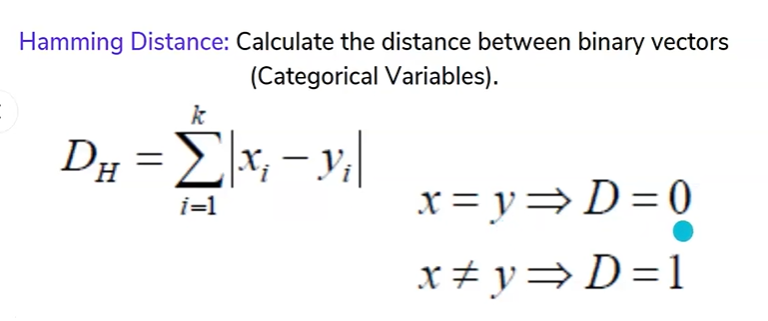

In [3]:
Image.open('s100.png')

        If the two categorical variables are same then we take D as 0.otherwise 1.

<h1> <font color='Red'>Steps to carried out during the KNN algorithm are as follows:<font></h1>

#### 1.Divide the data point into training and test data.
#### 2.Choose the number of K neighbours ,say K=5

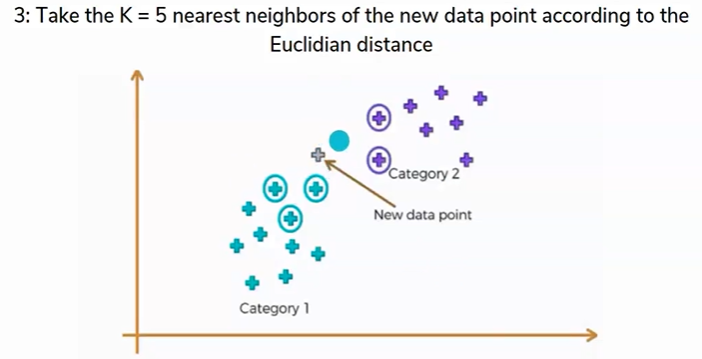

In [4]:
Image.open('s101.png')

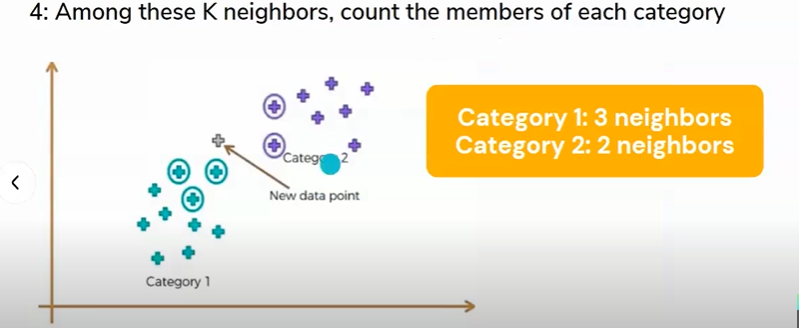

In [5]:
Image.open('s102.png')

        Here we have checked the 5 nearest neighbours according to the distance ,Here we got 3 neighbours in Category1 and 2 got in Category 2 so,as per voting the new data ponits belongs to Category 1 beacuse high neighbours.

# <font color='#FF33A1'>Choosing an Optimal Value of K in KNN<font>

   ###     'Square Root Method' 
                    The most common method is to take the square root value of the total number of traning instances of your data set.the rule of thumb is to take an odd number.The method jst works fine almost evry time.

        Always Our K value should be odd values ,If we take 100 data ,thier square root is 10 ,In this case the model predicts 5 of each classes ,so the model doesn't where should the data point should be go.for that ,we should take odd values as 11.

# <font color='#FF33A1'>HyperParameter Tuning<font>

        K is a hyperparameter of the KNN algorithm ( a hyperparameter is a property of the model provided by the user.).You can apply tuning methods such as grid Search to find the optimal value.For this ,taken the same data seperatley (do not use the test data) and apply fit a KNN model with grid Search to find the value of K taht perfectly works for your problem.

<div class='alert alert-info'>
    <h1>
        <center>
            <font color='Darkblue'> Implementation of the KNN<font>
            </center>      
    </h1>
</div>

# Step 1: Import Required Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Step 2: Load and Prepare the Data

In [51]:
#getting dataset from sklearn
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [52]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

        Our independent variables

In [53]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

        Our dependent variables

In [54]:
df=pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


<Axes: xlabel='target', ylabel='Count'>

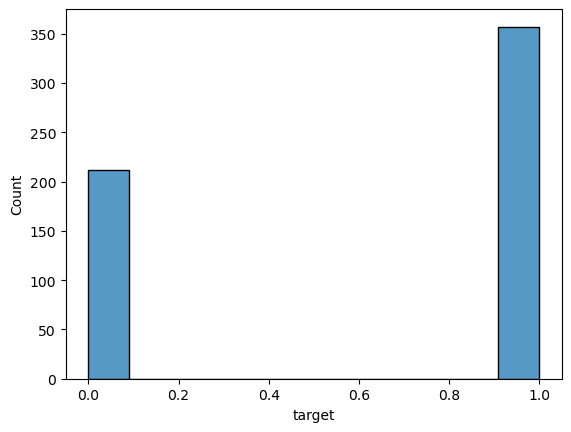

In [58]:
sns.histplot(df['target'])

In [11]:
#checking the null values 
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [12]:
# creating feature Matrix and dependent variable vector
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [15]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train.shape

(455, 30)

In [19]:
from math import sqrt
sqrt(455)

21.330729007701542

# Step 3: Train the KNN Model


In [31]:
# Initialize KNN model with K=5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25, metric='minkowski')

# Train the model
knn.fit(X_train, y_train)




KNeighborsClassifier(n_neighbors=25)

In [32]:
# Make predictions
y_pred = knn.predict(X_test)
y_pred

array([1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.])

# Step 4: Evaluate the Model

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
# Accuracy Score
print("Accuracy:", accuracy_score(y_test, y_pred))




Accuracy: 0.9473684210526315


In [35]:


# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93        43
         1.0       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[39,  4],
       [ 2, 69]], dtype=int64)

In [44]:
tn,fp,fn,tp=cm.ravel()
print(tn,fp,fn,tp)

39 4 2 69


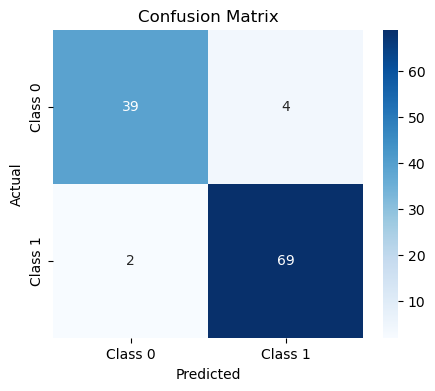

In [45]:
# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# 🔹 Choosing the Best Value of K
        A small K (e.g., 1 or 3) → More flexible but sensitive to noise.
        A large K (e.g., 10 or 15) → More stable but may underfit.
        Best approach: Use cross-validation to find the optimal K.
        

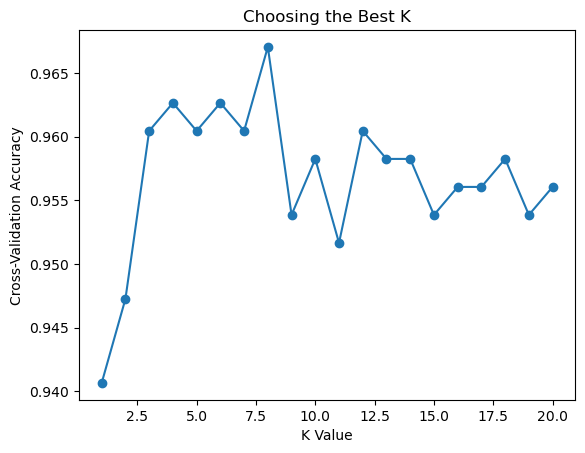

In [46]:
# Finding the best K using cross-validation
from sklearn.model_selection import cross_val_score

k_values = range(1, 21)
scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5).mean() for k in k_values]

# Plot accuracy vs. K values
plt.plot(k_values, scores, marker='o')
plt.xlabel("K Value")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Choosing the Best K")
plt.show()


# <font color='#FF33A1'>Applications<font>

        
        1.Finance- Financial institutes will predicts the credit rating of customers.
                
        2.Handwriting detection
                
        3.Image Recognition
               
        4.Vedio Recognisation
              
        5.Pattern Recognization

# <font color='#FF33A1'>🔹 Advantages of KNN<font>
        ✔ Simple and easy to implement
        ✔ No training phase (lazy learning)
        ✔ Works well with small datasets
        ✔ Can handle multi-class problems
        


# <font color='#FF33A1'>🔹 Limitations of KNN<font>
        ❌ Computationally expensive for large datasets
        ❌ Sensitive to irrelevant features
        ❌ Requires feature scaling (distance-based algorithm)
        ❌ Affected by imbalanced data
        


# 🚀 Key Takeaways
        ✔ KNN is a lazy learning algorithm that makes predictions based on neighbor similarity.
        ✔ It is sensitive to K value selection and requires distance metric tuning.
        ✔ Scaling data is necessary for better performance.
        ✔ Best suited for small to medium-sized datasets with fewer dimensions.